# **Santander**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [16]:
train='train.csv'
test='test.csv'
sample_submision='sample_submission.csv'

In [17]:
df_train=pd.read_csv(train,sep=',')
df_test=pd.read_csv(test,sep=',')
df_sample=pd.read_csv(sample_submision,sep=',')

In [18]:
print(df_train.shape)
print(df_test.shape)

(76020, 371)
(75818, 370)


In [19]:
df_train['TARGET'].value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

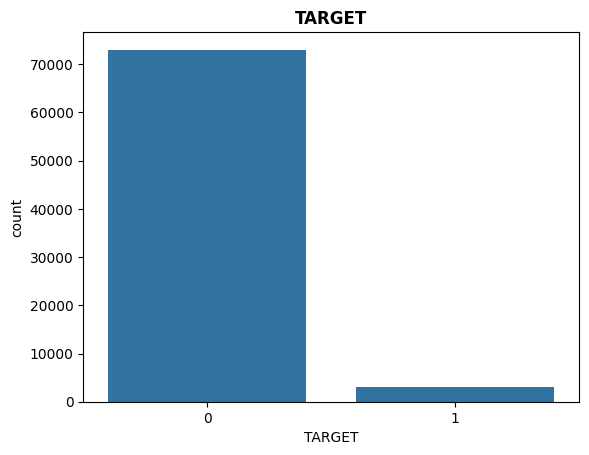

In [20]:
sns.countplot(data=df_train,x='TARGET')
plt.title('TARGET',fontsize=12,weight='bold')
plt.show()

In [21]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [22]:
print(df_train.isnull().sum().sum())
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0
0


In [23]:
print(f'Primera version {df_train['var3'].value_counts(ascending=False).head()}')
df_train['var3'].replace(-999999,2,inplace=True)
print(f'Segunda version {df_train['var3'].value_counts(ascending=False).head()}')

Primera version var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
Name: count, dtype: int64
Segunda version var3
2    74281
8      138
9      110
3      108
1      105
Name: count, dtype: int64


In [24]:
X=df_train.drop(columns=['TARGET'])
y=df_train['TARGET']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60816, 370), (15204, 370), (60816,), (15204,))

## **XGBCLASSIFIER**

In [26]:
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156) 
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])
y_pred = xgb.predict_proba(X_test)
y_pred

[0]	validation_0-auc:0.83791	validation_1-auc:0.82536
[1]	validation_0-auc:0.83961	validation_1-auc:0.82471
[2]	validation_0-auc:0.83991	validation_1-auc:0.82539
[3]	validation_0-auc:0.84026	validation_1-auc:0.82601
[4]	validation_0-auc:0.84163	validation_1-auc:0.82945
[5]	validation_0-auc:0.84367	validation_1-auc:0.82986
[6]	validation_0-auc:0.84487	validation_1-auc:0.83053
[7]	validation_0-auc:0.84586	validation_1-auc:0.82934
[8]	validation_0-auc:0.84736	validation_1-auc:0.83004
[9]	validation_0-auc:0.84790	validation_1-auc:0.83038
[10]	validation_0-auc:0.84859	validation_1-auc:0.83135
[11]	validation_0-auc:0.84895	validation_1-auc:0.83184
[12]	validation_0-auc:0.84906	validation_1-auc:0.83215
[13]	validation_0-auc:0.84949	validation_1-auc:0.83215
[14]	validation_0-auc:0.85005	validation_1-auc:0.83243
[15]	validation_0-auc:0.85253	validation_1-auc:0.83356
[16]	validation_0-auc:0.85324	validation_1-auc:0.83362
[17]	validation_0-auc:0.85408	validation_1-auc:0.83458
[18]	validation_0-au

array([[0.99431485, 0.00568518],
       [0.98005086, 0.01994914],
       [0.9896553 , 0.01034466],
       ...,
       [0.8934119 , 0.10658816],
       [0.9790064 , 0.02099359],
       [0.98412937, 0.01587062]], dtype=float32)

In [34]:
roc_auc_score(y_test, y_pred[:,1])

0.841423921068528

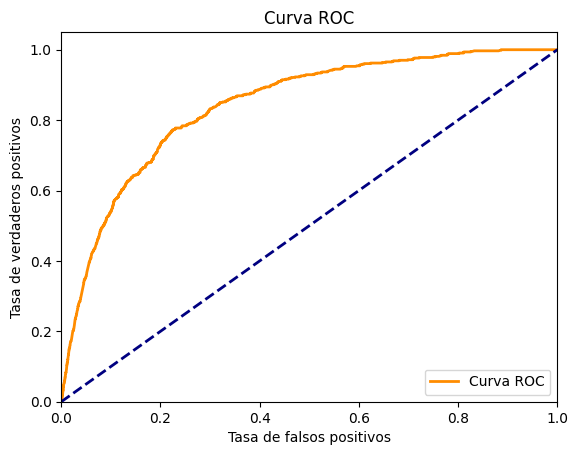

In [36]:
# Calcula la curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
# Gráfica la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [42]:
# test
pred_proba = xgb.predict_proba(df_test)
pred_proba

array([[0.9528629 , 0.04713707],
       [0.9317225 , 0.06827746],
       [0.99205625, 0.00794374],
       ...,
       [0.98789334, 0.01210666],
       [0.9193565 , 0.08064345],
       [0.9928091 , 0.00719091]], dtype=float32)

In [43]:
df_sample['TARGET'] = pred_proba[:,1]
df_sample.to_csv("submission.csv", index=False)